# Book Recommendation System

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
import joblib
sns.set(rc={"figure.figsize":[10,10]})

### reading data

In [2]:
df=pd.read_csv('books.csv', error_bad_lines=False)
df

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


### EDA and Cleaning data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [4]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [5]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [6]:
df.drop(['bookID','isbn','isbn13'],axis=1,inplace=True)

In [7]:
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press
11119,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,Penguin Books
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,Penguin Books
11121,Poor People,William T. Vollmann,3.72,eng,434,769,139,2/27/2007,Ecco


In [8]:
df['publication_date'].unique()

array(['9/16/2006', '9/1/2004', '11/1/2003', ..., '5/31/1998',
       '7/10/1977', '10/11/2003'], dtype=object)

In [9]:
df['publication_date']=pd.to_datetime(df['publication_date'],format='%m/%d/%Y', errors='coerce')

In [10]:
df['publication_month']=df['publication_date'].dt.month
df['publication_year']=df['publication_date'].dt.year

In [11]:
def get_publication_season(x):
    if x in [9,10,11]:
        return 'Fall'
    elif x in [12,1,2]:
        return 'Winter'
    elif x in [3,4,5]:
        return 'Spring'
    else:
        return 'Summer'
df['publication_season']=df['publication_month'].apply(get_publication_season)
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_month,publication_year,publication_season
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,9.0,2006.0,Fall
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,9.0,2004.0,Fall
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic,11.0,2003.0,Fall
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,5.0,2004.0,Spring
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic,9.0,2004.0,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,2004-12-21,Da Capo Press,12.0,2004.0,Winter
11119,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,1988-12-01,Penguin Books,12.0,1988.0,Winter
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,1993-08-01,Penguin Books,8.0,1993.0,Summer
11121,Poor People,William T. Vollmann,3.72,eng,434,769,139,2007-02-27,Ecco,2.0,2007.0,Winter


In [12]:
df['average_rating'].unique()

array([4.57, 4.49, 4.42, 4.56, 4.78, 3.74, 4.73, 4.38, 4.22, 4.21, 3.44,
       3.87, 4.07, 3.9 , 3.83, 3.86, 3.91, 3.93, 4.59, 4.5 , 4.36, 4.53,
       3.84, 3.72, 4.  , 3.88, 4.33, 3.45, 3.76, 3.6 , 4.06, 4.17, 3.55,
       3.98, 4.13, 3.95, 4.24, 4.34, 3.92, 4.23, 3.75, 3.94, 3.77, 4.46,
       3.68, 3.99, 3.25, 3.89, 3.82, 3.78, 4.01, 4.35, 4.28, 3.34, 3.67,
       3.48, 3.5 , 3.62, 4.27, 3.39, 4.12, 4.08, 4.05, 3.85, 2.99, 4.19,
       3.71, 4.2 , 3.65, 3.4 , 4.11, 3.42, 4.02, 3.69, 4.1 , 3.66, 4.61,
       4.04, 3.97, 4.14, 3.57, 3.43, 3.22, 3.64, 3.96, 3.8 , 3.81, 3.79,
       3.23, 4.15, 4.39, 4.03, 3.73, 3.51, 3.63, 3.09, 3.59, 4.29, 0.  ,
       4.25, 4.26, 3.61, 4.16, 4.55, 4.52, 3.41, 4.7 , 4.18, 3.58, 4.51,
       3.15, 3.31, 4.09, 3.49, 3.56, 4.47, 4.44, 3.7 , 4.32, 4.4 , 4.31,
       4.43, 2.8 , 3.46, 2.83, 4.62, 2.67, 4.45, 4.3 , 5.  , 3.1 , 3.08,
       3.27, 3.33, 3.  , 4.67, 4.63, 3.52, 3.36, 3.54, 3.17, 4.37, 3.29,
       4.64, 3.38, 3.37, 3.16, 3.53, 2.88, 2.98, 3.

In [13]:
df.drop('publication_date',axis=1,inplace=True)

In [14]:
df.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publisher             0
publication_month     2
publication_year      2
publication_season    0
dtype: int64

In [15]:
df.dropna(axis=0,inplace=True)

In [16]:
df.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publisher             0
publication_month     0
publication_year      0
publication_season    0
dtype: int64

In [59]:
df=df.reset_index(drop=True)

In [18]:
def is_part_of_a_series(x):
    if '#' in x:
        return 1
    else :
        return 0
df['is_part_of_a_series']=df['title'].apply(is_part_of_a_series)
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_month,publication_year,publication_season,is_part_of_a_series
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,Scholastic Inc.,9.0,2006.0,Fall,1
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,Scholastic Inc.,9.0,2004.0,Fall,1
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,Scholastic,11.0,2003.0,Fall,1
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,Scholastic Inc.,5.0,2004.0,Spring,1
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,Scholastic,9.0,2004.0,Fall,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11116,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,Da Capo Press,12.0,2004.0,Winter,0
11117,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,Penguin Books,12.0,1988.0,Winter,0
11118,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,Penguin Books,8.0,1993.0,Summer,1
11119,Poor People,William T. Vollmann,3.72,eng,434,769,139,Ecco,2.0,2007.0,Winter,0


In [19]:
df[df['average_rating']==df['average_rating'].max()][['authors','average_rating','ratings_count']]

,authors,average_rating,ratings_count
624,Aristophanes/F.W. Hall/W.M. Geldart,5.0,0
786,Julie Sylvester/David Sylvester,5.0,1
855,Tara MacCarthy,5.0,4
1243,Middlesex Borough Heritage Committee,5.0,2
4125,Tim Bogenn,5.0,2
4788,John Diamond,5.0,5
4933,Elena N. Mahlow,5.0,4
5023,Ian Martin/Katie Elliott,5.0,1
5474,NOT A BOOK,5.0,3
5476,NOT A BOOK,5.0,2


In [20]:
df = df[df['authors']!='NOT A BOOK']

In [21]:
df[df['ratings_count']==df['ratings_count'].max()][['title','authors','average_rating','ratings_count']]

,title,authors,average_rating,ratings_count
10335,Twilight (Twilight #1),Stephenie Meyer,3.59,4597666


In [22]:
df=df.replace(to_replace='J.K. Rowling/Mary GrandPré', value = 'J.K. Rowling')

In [27]:
df[df['  num_pages']==df['  num_pages'].min()][['title','  num_pages']]

,title,num_pages
370,Men Are from Mars Women Are from Venus,2
636,The Long Goodbye (Philip Marlowe #6),2
2850,The Mist,2
4544,Hercule Poirot's Christmas: A BBC Radio 4 Full...,2
4563,Joy in the Morning,2
5583,Cover Her Face (Adam Dalgliesh #1),2
6231,Astronomy Today,2
8149,A Pocket Full of Rye: A BBC Radio 4 Full-Cast ...,2
8518,The Monkey,2
8577,The House on Mango Street,2


In [28]:
df = df[df['  num_pages']!=df['  num_pages'].min()]

In [107]:
df[df['  num_pages']==df['  num_pages'].min()][['title','  num_pages']]

,title,num_pages
3454,Essential Welty: Why I Live at the P.O. A Mem...,1
4270,The Return of the King (The Lord of the Rings ...,1
4944,Lobsters,1
4945,Antibodies,1
5650,Meditations for Manifesting: Morning and Eveni...,1
5755,The Best American Mystery Stories 2003,1
5779,The Best American Mystery Stories 2002,1
5944,The Neil Gaiman Audio Collection,1
8505,LT's Theory of Pets,1
9036,There Was a Cold Lady Who Swallowed Some Snow!,1


In [108]:
df = df[df['  num_pages']!=df['  num_pages'].min()]

In [29]:
df[df['  num_pages']<=10][['title','  num_pages']]

,title,num_pages
10,The Hitchhiker's Guide to the Galaxy (Hitchhik...,6
215,Lord of the Flies,6
324,The Richest Man in Babylon,4
330,Purpose Driven Life - For Commuters: What on E...,5
673,The Old Man and the Sea,3
...,...,...
10907,Naked,3
10968,Howards End,9
11003,The Roald Dahl Audio Collection,4
11075,Artemis Fowl (Artemis Fowl #1),6


In [30]:
df = df[df['  num_pages']>10]

In [31]:
df.shape

(10913, 12)

In [32]:
df.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,publication_month,publication_year,is_part_of_a_series
count,10913.000000,10913.000000,1.091300e+04,10913.000000,10913.000000,10913.000000,10913.000000
mean,3.933927,342.691102,1.827626e+04,551.840099,6.553102,2000.135710,0.212865
std,0.347894,238.951022,1.135502e+05,2600.290074,3.416332,8.270048,0.409352
min,0.000000,11.000000,0.000000e+00,0.000000,1.000000,1900.000000,0.000000
25%,3.770000,200.000000,1.130000e+02,9.000000,4.000000,1998.000000,0.000000
50%,3.960000,304.000000,7.880000e+02,48.000000,7.000000,2003.000000,0.000000
75%,4.130000,416.000000,5.157000e+03,245.000000,10.000000,2005.000000,0.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000,12.000000,2020.000000,1.000000


In [33]:
df['num_pages']=df['  num_pages']
df.drop('  num_pages',axis=1,inplace=True)

In [34]:
df

,title,authors,average_rating,language_code,ratings_count,text_reviews_count,publisher,publication_month,publication_year,publication_season,is_part_of_a_series,num_pages
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,2095690,27591,Scholastic Inc.,9.0,2006.0,Fall,1,652
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,2153167,29221,Scholastic Inc.,9.0,2004.0,Fall,1,870
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,6333,244,Scholastic,11.0,2003.0,Fall,1,352
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,2339585,36325,Scholastic Inc.,5.0,2004.0,Spring,1,435
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,41428,164,Scholastic,9.0,2004.0,Fall,1,2690
...,...,...,...,...,...,...,...,...,...,...,...,...
11116,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,156,20,Da Capo Press,12.0,2004.0,Winter,0,512
11117,You Bright and Risen Angels,William T. Vollmann,4.08,eng,783,56,Penguin Books,12.0,1988.0,Winter,0,635
11118,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,820,95,Penguin Books,8.0,1993.0,Summer,1,415
11119,Poor People,William T. Vollmann,3.72,eng,769,139,Ecco,2.0,2007.0,Winter,0,434


In [35]:
df['language_code'].value_counts()

eng      8736
en-US    1378
spa       217
en-GB     210
fre       142
ger        98
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
rus         2
swe         2
glg         1
srp         1
ale         1
gla         1
wel         1
nor         1
nl          1
tur         1
ara         1
msa         1
Name: language_code, dtype: int64

<AxesSubplot:xlabel='title'>

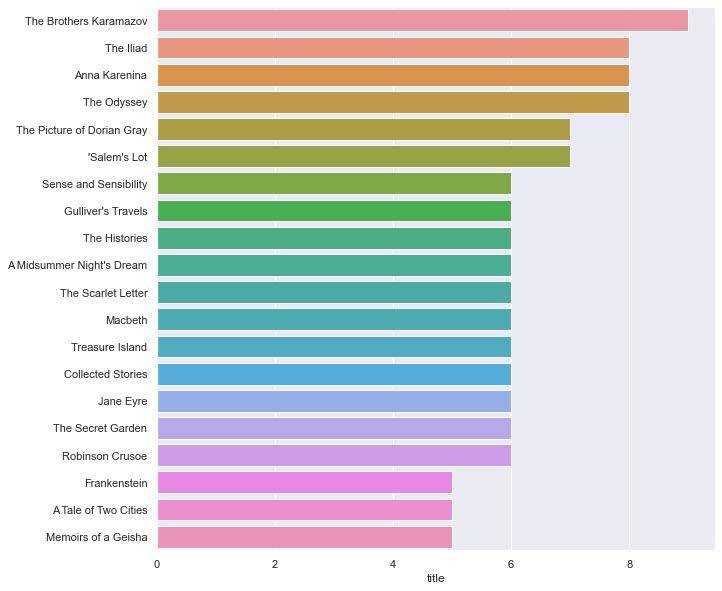

In [36]:
books = df['title'].value_counts()[:20]
rating = df.average_rating[:20]
sns.barplot(x = books, y = books.index)

C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings_count', ylabel='title'>

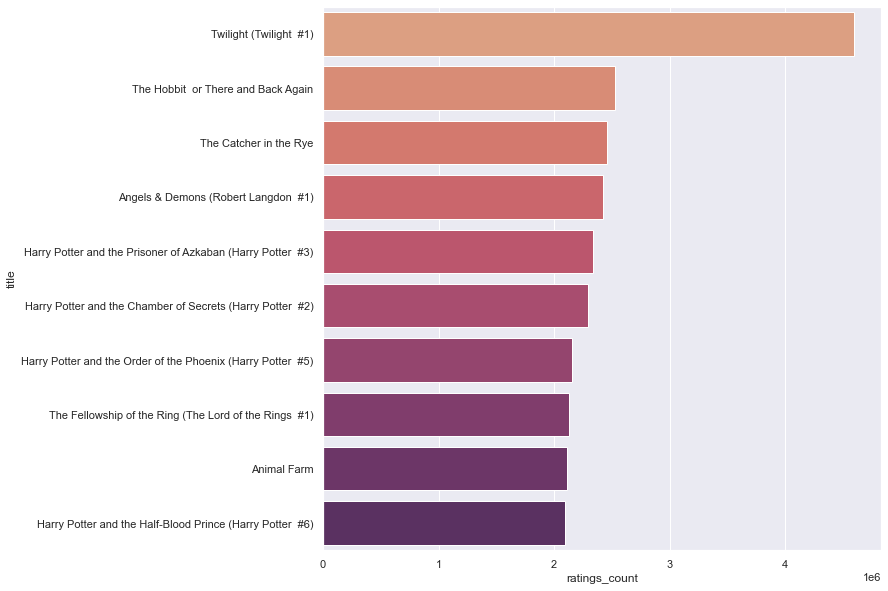

In [37]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='flare')

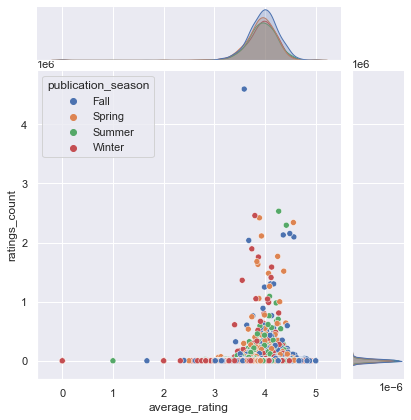

In [38]:
sns.jointplot(x='average_rating',y='ratings_count',data=df,hue='publication_season')

C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_part_of_a_series', ylabel='count'>

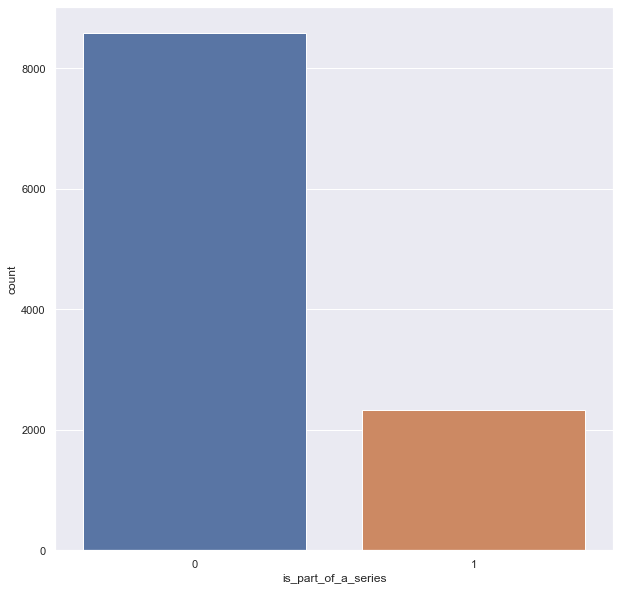

In [39]:
sns.countplot(df['is_part_of_a_series'])

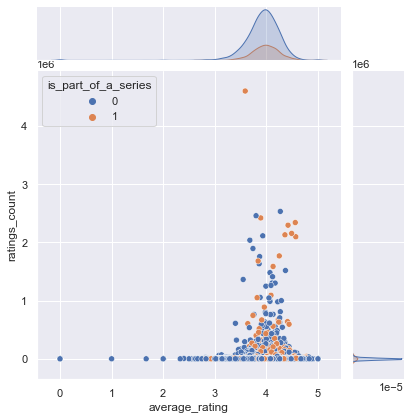

In [120]:
sns.jointplot(x='average_rating',y='ratings_count',data=df,hue='is_part_of_a_series')

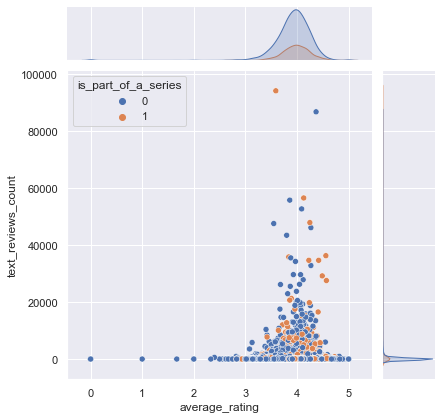

In [40]:
sns.jointplot(x='average_rating',y='text_reviews_count',data=df,hue='is_part_of_a_series')

<AxesSubplot:xlabel='count', ylabel='publication_year'>

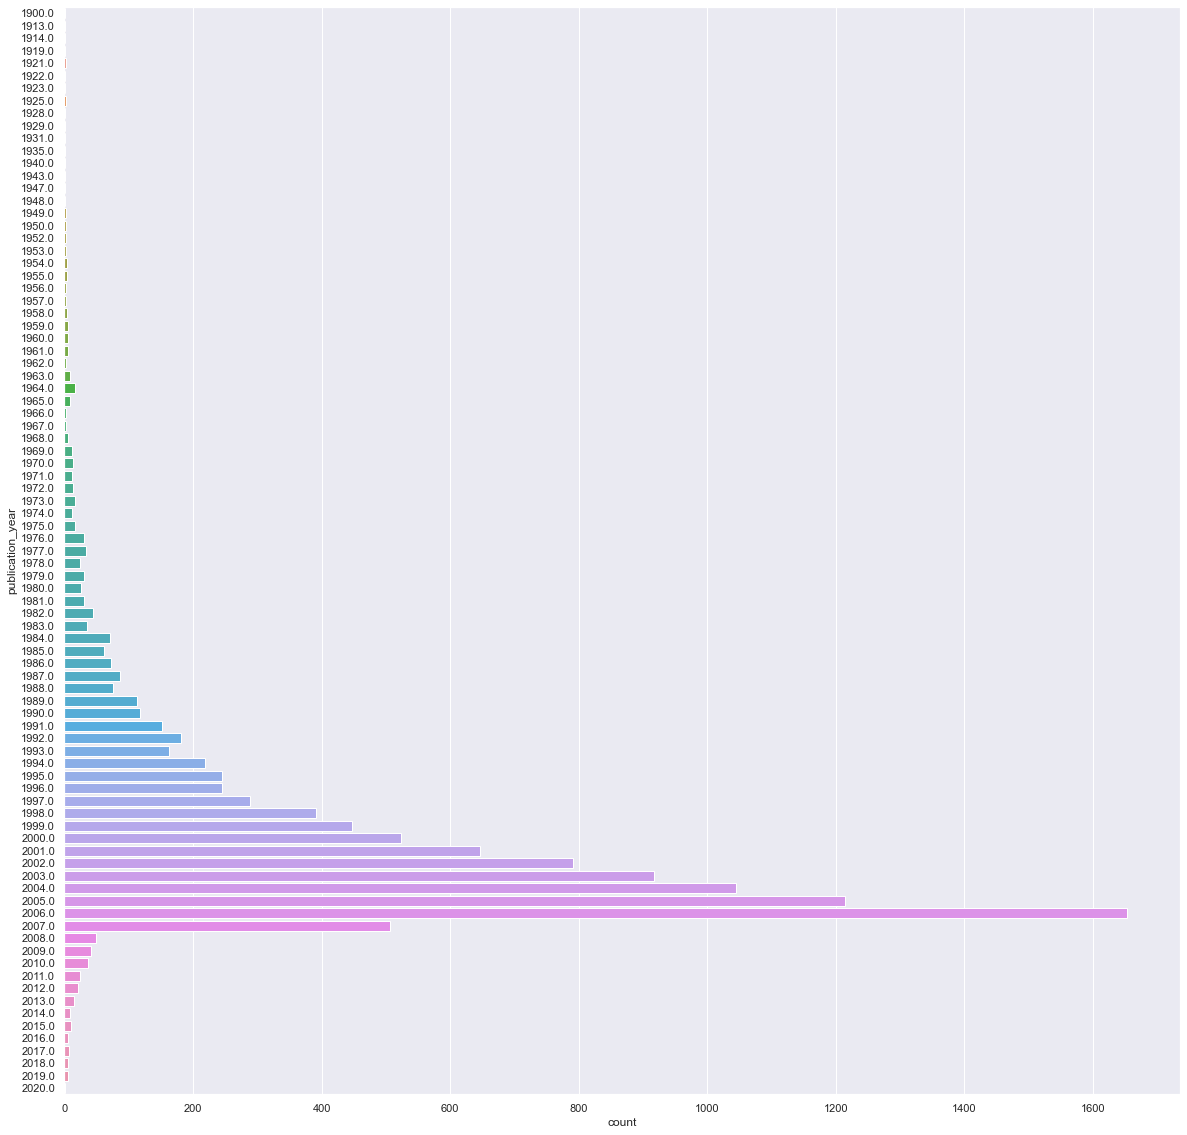

In [41]:
sns.set(rc={"figure.figsize":[20,20]})
sns.countplot(y=df['publication_year'])

C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='publication_season', ylabel='count'>

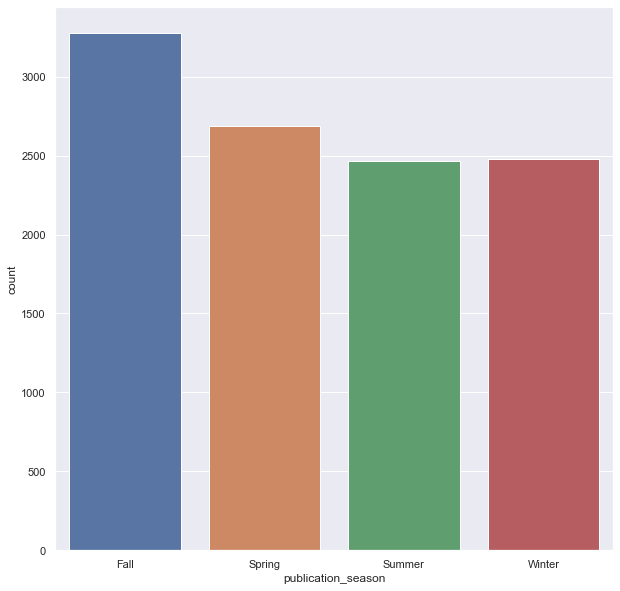

In [42]:
sns.set(rc={"figure.figsize":[10,10]})
sns.countplot(df['publication_season'])

C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='publication_month', ylabel='count'>

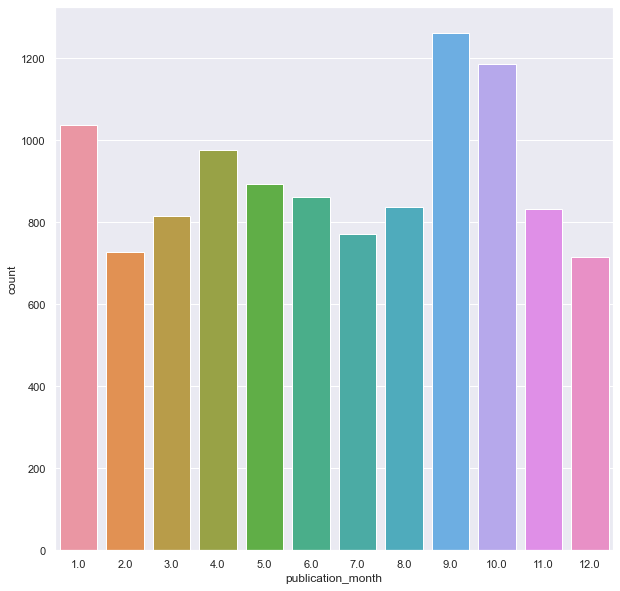

In [43]:
sns.countplot(df['publication_month'])

<AxesSubplot:xlabel='count', ylabel='language_code'>

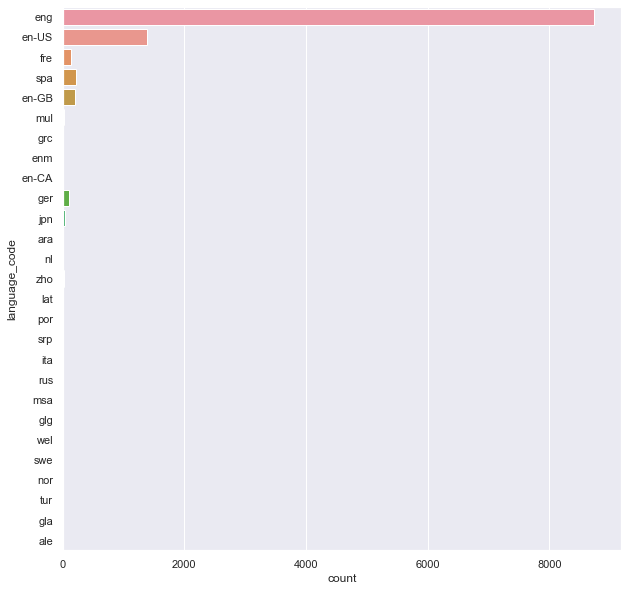

In [44]:
sns.countplot(y=df['language_code'])

<AxesSubplot:xlabel='authors'>

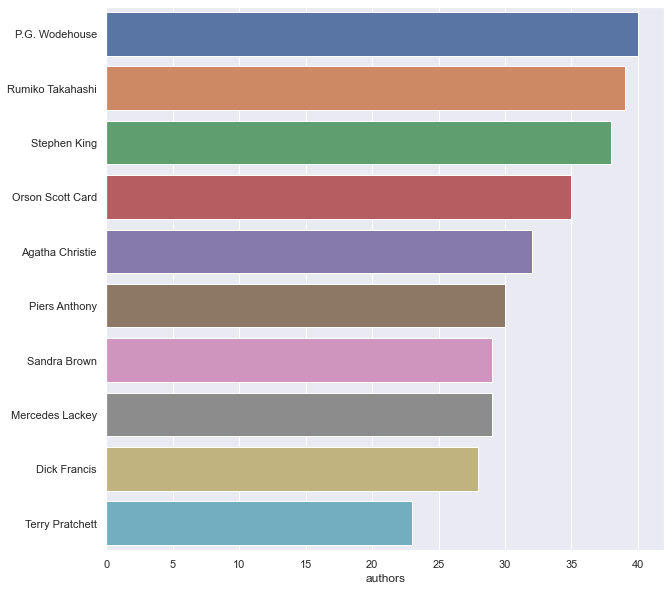

In [45]:
authors=df['authors'].value_counts()[:10]
sns.barplot(x = authors, y = authors.index)

In [46]:
df

,title,authors,average_rating,language_code,ratings_count,text_reviews_count,publisher,publication_month,publication_year,publication_season,is_part_of_a_series,num_pages
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,2095690,27591,Scholastic Inc.,9.0,2006.0,Fall,1,652
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,2153167,29221,Scholastic Inc.,9.0,2004.0,Fall,1,870
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,6333,244,Scholastic,11.0,2003.0,Fall,1,352
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,2339585,36325,Scholastic Inc.,5.0,2004.0,Spring,1,435
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,41428,164,Scholastic,9.0,2004.0,Fall,1,2690
...,...,...,...,...,...,...,...,...,...,...,...,...
11116,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,156,20,Da Capo Press,12.0,2004.0,Winter,0,512
11117,You Bright and Risen Angels,William T. Vollmann,4.08,eng,783,56,Penguin Books,12.0,1988.0,Winter,0,635
11118,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,820,95,Penguin Books,8.0,1993.0,Summer,1,415
11119,Poor People,William T. Vollmann,3.72,eng,769,139,Ecco,2.0,2007.0,Winter,0,434


<AxesSubplot:xlabel='publisher'>

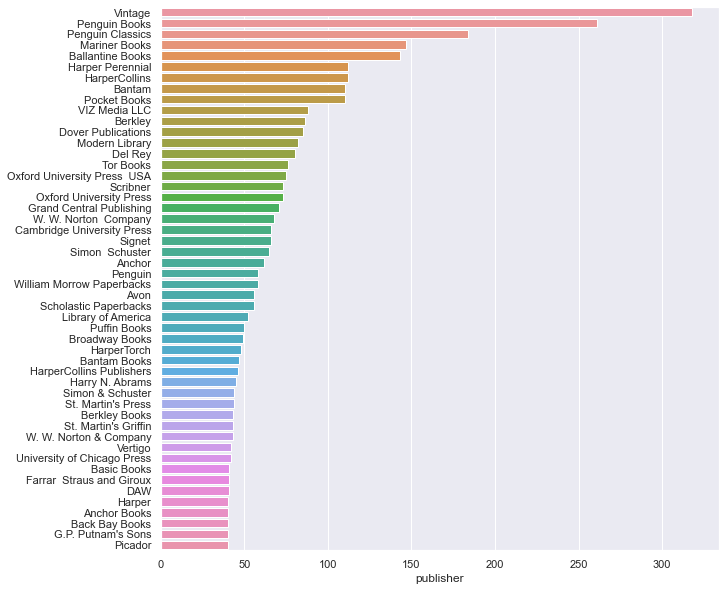

In [47]:
publisher=df['publisher'].value_counts()[:50]
sns.barplot(x = publisher, y = publisher.index)

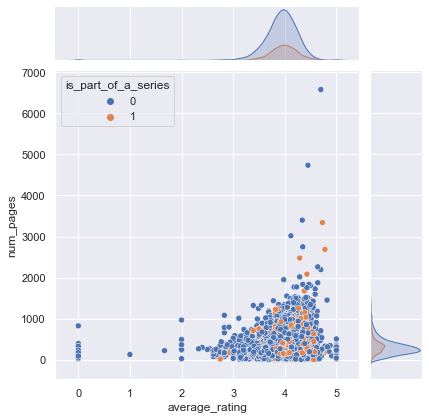

In [48]:
sns.jointplot(x=df['average_rating'],y=df['num_pages'],hue=df['is_part_of_a_series'])

<AxesSubplot:>

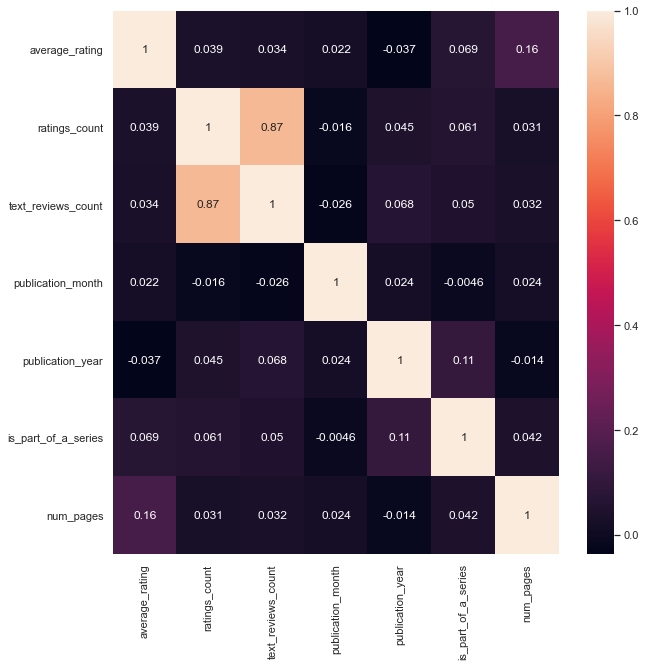

In [49]:
sns.heatmap(df.corr(),annot=True)

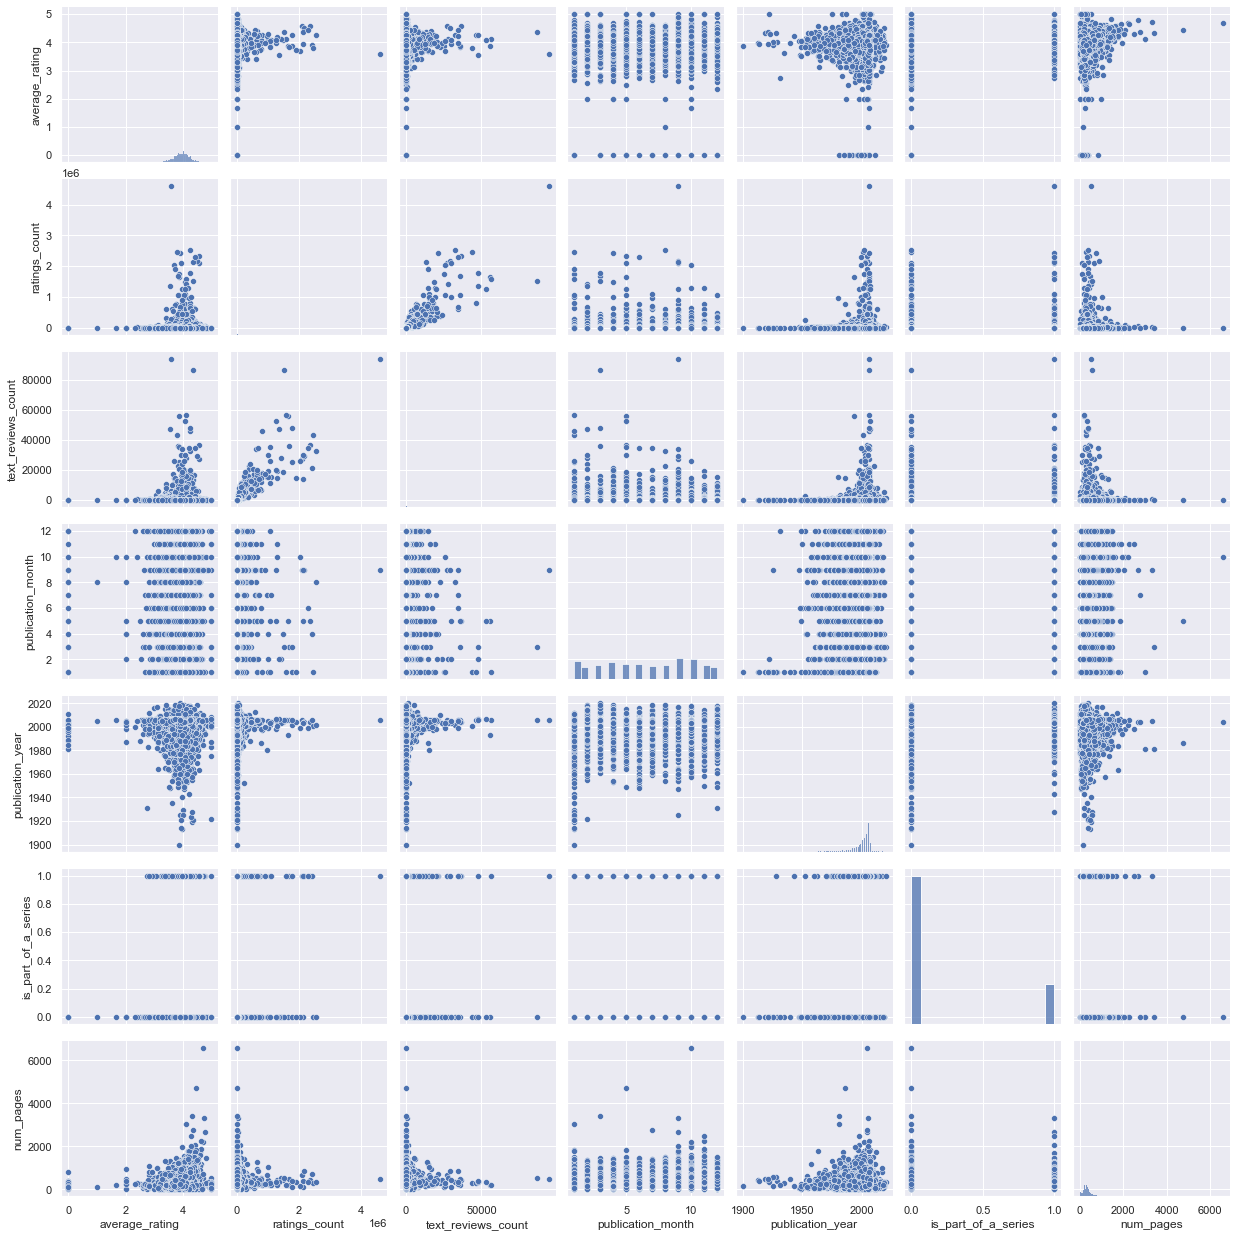

In [50]:
sns.pairplot(df)

### Data preprocessing

In [51]:
def get_rating_groups(x):
    if x<=5 and x>4:
        return 'between 4 and 5'
    elif x<=4 and x>3:
        return 'between 3 and 4'
    elif x<=3 and x>2:
        return 'between 2 and 4'
    elif x<=2 and x>1:
        return 'between 1 and 2'
    elif x<=1 and x>=0:
        return 'between 0 and 1'
df['avg_rating']=df['average_rating'].apply(get_rating_groups)
df

,title,authors,average_rating,language_code,ratings_count,text_reviews_count,publisher,publication_month,publication_year,publication_season,is_part_of_a_series,num_pages,avg_rating
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,2095690,27591,Scholastic Inc.,9.0,2006.0,Fall,1,652,between 4 and 5
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,2153167,29221,Scholastic Inc.,9.0,2004.0,Fall,1,870,between 4 and 5
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,6333,244,Scholastic,11.0,2003.0,Fall,1,352,between 4 and 5
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,2339585,36325,Scholastic Inc.,5.0,2004.0,Spring,1,435,between 4 and 5
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,41428,164,Scholastic,9.0,2004.0,Fall,1,2690,between 4 and 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11116,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,156,20,Da Capo Press,12.0,2004.0,Winter,0,512,between 4 and 5
11117,You Bright and Risen Angels,William T. Vollmann,4.08,eng,783,56,Penguin Books,12.0,1988.0,Winter,0,635,between 4 and 5
11118,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,820,95,Penguin Books,8.0,1993.0,Summer,1,415,between 3 and 4
11119,Poor People,William T. Vollmann,3.72,eng,769,139,Ecco,2.0,2007.0,Winter,0,434,between 3 and 4


C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_rating', ylabel='count'>

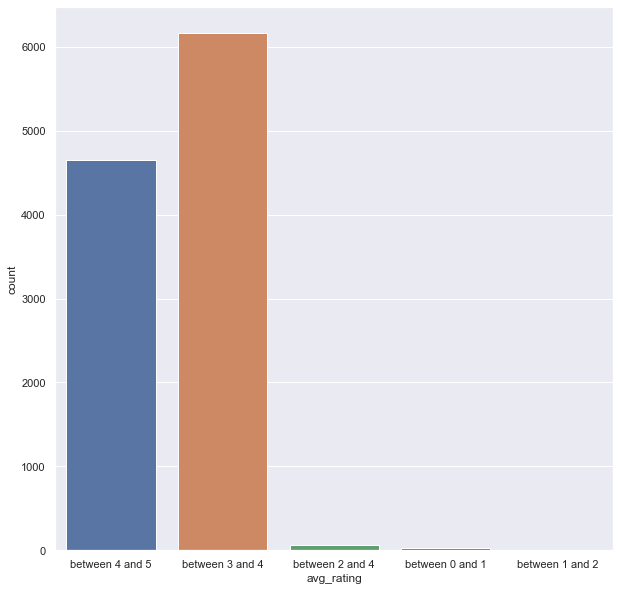

In [52]:
sns.countplot(df['avg_rating'])

In [60]:
x=df[['ratings_count','publication_year','avg_rating','language_code','average_rating','is_part_of_a_series','num_pages']]
x

,ratings_count,publication_year,avg_rating,language_code,average_rating,is_part_of_a_series,num_pages
0,2095690,2006.0,between 4 and 5,eng,4.57,1,652
1,2153167,2004.0,between 4 and 5,eng,4.49,1,870
2,6333,2003.0,between 4 and 5,eng,4.42,1,352
3,2339585,2004.0,between 4 and 5,eng,4.56,1,435
4,41428,2004.0,between 4 and 5,eng,4.78,1,2690
...,...,...,...,...,...,...,...
10908,156,2004.0,between 4 and 5,eng,4.06,0,512
10909,783,1988.0,between 4 and 5,eng,4.08,0,635
10910,820,1993.0,between 3 and 4,eng,3.96,1,415
10911,769,2007.0,between 3 and 4,eng,3.72,0,434


In [61]:
x= pd.get_dummies(x,columns=['avg_rating'],drop_first=True)
x

,ratings_count,publication_year,language_code,average_rating,is_part_of_a_series,num_pages,avg_rating_between 1 and 2,avg_rating_between 2 and 4,avg_rating_between 3 and 4,avg_rating_between 4 and 5
0,2095690,2006.0,eng,4.57,1,652,0,0,0,1
1,2153167,2004.0,eng,4.49,1,870,0,0,0,1
2,6333,2003.0,eng,4.42,1,352,0,0,0,1
3,2339585,2004.0,eng,4.56,1,435,0,0,0,1
4,41428,2004.0,eng,4.78,1,2690,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
10908,156,2004.0,eng,4.06,0,512,0,0,0,1
10909,783,1988.0,eng,4.08,0,635,0,0,0,1
10910,820,1993.0,eng,3.96,1,415,0,0,1,0
10911,769,2007.0,eng,3.72,0,434,0,0,1,0


In [62]:
x= pd.get_dummies(x,columns=['language_code'],drop_first=True)
x

,ratings_count,publication_year,average_rating,is_part_of_a_series,num_pages,avg_rating_between 1 and 2,avg_rating_between 2 and 4,avg_rating_between 3 and 4,avg_rating_between 4 and 5,language_code_ara,...,language_code_nl,language_code_nor,language_code_por,language_code_rus,language_code_spa,language_code_srp,language_code_swe,language_code_tur,language_code_wel,language_code_zho
0,2095690,2006.0,4.57,1,652,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2153167,2004.0,4.49,1,870,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,6333,2003.0,4.42,1,352,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2339585,2004.0,4.56,1,435,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,41428,2004.0,4.78,1,2690,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10908,156,2004.0,4.06,0,512,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10909,783,1988.0,4.08,0,635,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10910,820,1993.0,3.96,1,415,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10911,769,2007.0,3.72,0,434,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.82959503e+01,  7.09132389e-01,  1.82843771e+00, ...,
        -9.57299476e-03, -9.57299476e-03, -3.58402220e-02],
       [ 1.88021549e+01,  4.67284747e-01,  1.59847212e+00, ...,
        -9.57299476e-03, -9.57299476e-03, -3.58402220e-02],
       [-1.05185223e-01,  3.46360927e-01,  1.39725223e+00, ...,
        -9.57299476e-03, -9.57299476e-03, -3.58402220e-02],
       ...,
       [-1.53738659e-01, -8.62877282e-01,  7.49500706e-02, ...,
        -9.57299476e-03, -9.57299476e-03, -3.58402220e-02],
       [-1.54187820e-01,  8.30056210e-01, -6.14946706e-01, ...,
        -9.57299476e-03, -9.57299476e-03, -3.58402220e-02],
       [-1.59965265e-01,  7.09132389e-01, -6.87784246e-02, ...,
        -9.57299476e-03, -9.57299476e-03, -3.58402220e-02]])

In [64]:
model=neighbors.NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

model.fit(x_scaled)

dist, idlist=model.kneighbors(x_scaled)
print(dist)
print(idlist)

[[0.         1.09545568 1.30836157 ... 4.75230041 4.80307403 4.94465457]
 [0.         1.09545568 2.02532704 ... 4.6842952  5.16401439 5.32946751]
 [0.         0.17032037 0.17878077 ... 0.35256795 0.35427241 0.35864308]
 ...
 [0.         0.15833363 0.26440871 ... 0.34916609 0.3507499  0.38791048]
 [0.         0.12069601 0.13128469 ... 0.187884   0.21532281 0.21690002]
 [0.         0.19551301 0.20237595 ... 0.31879172 0.32595879 0.35713976]]
[[    0     1    22 ...  2083  1673  4925]
 [    1     0    22 ...  1673  2083  4925]
 [    2  3051  3056 ...  8894  4916  8752]
 ...
 [10910 10467  5979 ...  2230  7257  6539]
 [10911 10851  6637 ... 10578  4513  2705]
 [10912   350  3429 ...  6197 10825 10698]]


In [65]:
def book_rec(x):
    book_list=[]
    book_id=df[df['title']==x].index
    book_id=book_id[0]
    for new in idlist[book_id]:
        book_list.append(df.loc[new].title)
    return book_list

Book_name=book_rec('Expelled from Eden: A William T. Vollmann Reader')
Book_name



['Expelled from Eden: A William T. Vollmann Reader',
 'Great Short Works of Herman Melville',
 'The Bromeliad Trilogy (Omnibus: Truckers / Diggers / Wings)',
 'Collected Prose: Autobiographical Writings  True Stories  Critical Essays  Prefaces  and Collaborations with Artists',
 'Guns  Germs and Steel: The Fates of Human Societies',
 'Cloud Atlas',
 'One Hundred Years of Solitude',
 'Shout! The Beatles in Their Generation',
 "Charlie Wilson's War: The Extraordinary Story of the Largest Cover Operation in History",
 'Not Without My Daughter']

In [66]:
def author_rec(x):
    authors_list=[]
    authors_id=df[df['authors']==x].index
    authors_id=authors_id[0]
    for new in idlist[authors_id]:
        authors_list.append(df.loc[new].authors)
    return authors_list

author_name=author_rec('Mark Twain')
author_name


['Mark Twain',
 'David Sedaris/Joe Mantello',
 'Annie Dillard',
 'Sylvia Plath',
 'Billy Collins',
 'Edward Gorey',
 'David Wiesner',
 'Dr. Seuss',
 'Kahlil Gibran/John Walbridge/Robin Waterfield',
 'Nancy White Carlstrom/Lori McElrath-Eslick']

In [67]:
def book_rec_by_author_name(x):
    authors_list=[]
    authors_id=df[df['authors']==x].index
    authors_id=authors_id[0]
    for new in idlist[authors_id]:
        authors_list.append(df.loc[new].title)
    return authors_list

book_by_author_name=book_rec_by_author_name('Mark Twain')
book_by_author_name

['The Wit and Wisdom of Mark Twain',
 "The SantaLand Diaries and Season's Greetings",
 'Holy the Firm',
 'The Colossus and Other Poems',
 'The Apple that Astonished Paris',
 'The Curious Sofa',
 'Sector 7',
 'The Cat in the Hat',
 'The Beloved: Reflections on the Path of the Heart',
 'Does God Know How to Tie Shoes?']

In [68]:
def book_rec_by_publisher_name(x):
    publisher_list=[]
    publisher_id=df[df['publisher']==x].index
    publisher_id=publisher_id[0]
    for new in idlist[publisher_id]:
        publisher_list.append(df.loc[new].title)
    return publisher_list
book_by_publisher_name=book_rec_by_publisher_name('Penguin Books')
book_by_publisher_name

['Anna Karenina',
 'Anna Karenina',
 'Anna Karenina',
 'Anna Karenina',
 'Up Country',
 'The Divine Comedy',
 'Our Mutual Friend',
 'Japan (Lonely Planet Guide)',
 'Bleak House',
 'As the Crow Flies']

In [181]:
!pip install flask gunicorn

In [69]:
joblib.dump(model,'model.h5')


['model.h5']